In [6]:
from gensim.summarization import summarize
from nltk.corpus import brown
import nltk
from nltk import bigrams, trigrams
from textblob.classifiers import NaiveBayesClassifier
from textblob import TextBlob
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from textblob.tokenizers import SentenceTokenizer, WordTokenizer
import numpy as np
from collections import Counter
from pos import pos_count
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import normalize

from pos import pos_count, compare_pos_count
from case_to_sent_vecs import case_to_sents
# from casedf import case_to_df, cases_to_df
import casedf
import metrics
import textstat

from lib.readability_score.calculators.fleschkincaid import FleschKincaid


'''
syllable_count, flesch_reading_ease, flesch_kincaid_grade, gunning_fog, smog_index, 
linsear_write_formula, dale_chall_readability_score


Flesch Reading Ease
* 90-100 : Very Easy 
* 80-89 : Easy 
* 70-79 : Fairly Easy 
* 60-69 : Standard 
* 50-59 : Fairly Difficult 
* 30-49 : Difficult 
* 0-29 : Very Confusing


Flesch-Kincaid Grade Formula.
For example a score of 9.3 means that a ninth grader would be able to read the document.


gunning_fog #The Fog Scale (Gunning FOG Formula)

SMOG Index

'''


from sklearn.cross_validation import KFold, cross_val_score
import matplotlib.pyplot as plt

import lib.readability_score as read_score
import seaborn as sns

%matplotlib inline


from sklearn.externals import joblib
# joblib.dump(clf, 'filename.pkl') 

#then your colleagues can load it

# clf = joblib.load('filename.pk1')

In [7]:
justia = pd.read_csv('../data/2005_justia.csv', delimiter='|')

In [8]:
reload(metrics)
reload(casedf)

<module 'casedf' from 'casedf.pyc'>

In [9]:
df = casedf.cases_to_df(justia['opinion'].values, justia['docket_no'].values)

In [10]:
df.columns

Index([u'reference', u'text', u'length', u'percent_nouns', u'subjectivity',
       u'polarity', u'has_reason', u'has_therefore', u'has_reject',
       u'has_applied', u'has_standard', u'has_fact', u'has_argue'],
      dtype='object')

In [11]:
# tfidf = TfidfVectorizer(stop_words='english', max_features=40)
# vecs = tfidf.fit_transform(df['text'].values)
# vecs_array = vecs.toarray()
# tfidf_vocab = sorted(tfidf.vocabulary_.keys())
# vocab_vecs = zip(tfidf_vocab, vecs_array.reshape(40, 4237))

In [12]:
# for vocab, vec in vocab_vecs:
# #     print vocab, vec.shape()
#     df[vocab] = vec

In [13]:
set(df.columns)

{'has_applied',
 'has_argue',
 'has_fact',
 'has_reason',
 'has_reject',
 'has_standard',
 'has_therefore',
 'length',
 'percent_nouns',
 'polarity',
 'reference',
 'subjectivity',
 'text'}

In [14]:
df.columns

Index([u'reference', u'text', u'length', u'percent_nouns', u'subjectivity',
       u'polarity', u'has_reason', u'has_therefore', u'has_reject',
       u'has_applied', u'has_standard', u'has_fact', u'has_argue'],
      dtype='object')

In [15]:
# select_cols = [ u'length', u'percent_nouns',  u'subjectivity',
#             u'polarity',    u'has_reason', u'has_therefore',    u'has_reject',
#          u'has_applied',  u'has_standard',      u'has_fact',     u'has_argue',
#                  u'act',        u'action',       u'appeals',          u'case',
#                u'cases',    u'certiorari',       u'circuit',         u'claim',
#               u'claims',         u'court',        u'courts',           u'did',
#             u'district',          u'does',      u'evidence',       u'federal',
#                u'filed',       u'general',          u'held',   u'information',
#               u'joined',      u'judgment',          u'jury',           u'law',
#                u'legal',          u'make',      u'official',       u'opinion',
#           u'petitioner',   u'petitioners',            u'pp',   u'respondents',
#                 u'rule',          u'site',         u'state',        u'states',
#              u'supreme',           u'tax',         u'trial',        u'united']

select_cols= [u'length', u'percent_nouns', u'subjectivity',
       u'polarity', u'has_reason', u'has_therefore', u'has_reject',
       u'has_applied', u'has_standard', u'has_fact', u'has_argue']

In [16]:
df.to_csv(path_or_buf='../data/2005_justia_df.csv', sep='+')

In [17]:
df['reference'].unique()

array(['04-1140', '04-881', '04-631', '04-712', '05-101', '04-373',
       '04-698', '03-1238', '04-759', '04-1538', '04-9949', '04-1475',
       '04-8384', '03-1500', '03-1693', '04-277', '04-278', '04-480',
       '04-514', '03-10198', '03-1566', '04-108', '04-563', '04-6432',
       '04-70', '03-1230', '03-1234', '04-169', '04-340', '04-5286',
       '04-5462', '03-1237', '03-9659', '04-495', '04-603', '04-637',
       '04-6964', '03-1388', '03-1454', '03-1488', '03-9877', '04-368',
       '03-1164', '04-163', '04-37', '04-5293', '04-5928', '03-1116',
       '03-388', '03-9627', '03-725', '03-750', '03-932', '03-1407',
       '03-9685', '03-1160', '03-1696', '03-9046', '02-1672', '03-855',
       '03-1039', '03-1423', '03-1601', '03-184', '03-287', '03-9168',
       '03-1395', '02-1472', '03-633', '03-636', '03-814', '03-8661',
       '03-892', '03-923', '03-9560', '04-394', '03-674', '03-878',
       '04-104', '03-1293'], dtype=object)

In [18]:
select_cols

[u'length',
 u'percent_nouns',
 u'subjectivity',
 u'polarity',
 u'has_reason',
 u'has_therefore',
 u'has_reject',
 u'has_applied',
 u'has_standard',
 u'has_fact',
 u'has_argue']

In [19]:
# for case in df[df['reference'] == ['04-881', '04-631', '04-712', '05-101', '04-373',
#        '04-698', '03-1238', '04-759', '04-1538', '04-9949']]:
#     print case['text']
    
case04881 = df[df['reference'] == '04-881']
X04881 = case04881[select_cols]
y04881= [0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [20]:
X04881.shape

(27, 11)

In [21]:
len(y04881)

27

In [22]:
case04712 = df[df['reference'] == '04-712']
X04712 = case04712[select_cols]
y04712 = [0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

In [23]:
case04712

,reference,text,length,percent_nouns,subjectivity,polarity,has_reason,has_therefore,has_reject,has_applied,has_standard,has_fact,has_argue
139,04-712,LINCOLN PROPERTY CO. etal.,4,0.250000,0.000000,0.000000,0,0,0,0,0,0,0
140,04-712,v. ROCHE et ux.,4,0.250000,0.000000,0.000000,0,0,0,0,0,0,0
141,04-712,certiorari to the united states court of appea...,13,0.076923,0.000000,0.000000,0,0,0,0,0,0,0
142,04-712,"04712.Argued October 11, 2005Decided November ...",39,0.230769,0.425000,0.237500,0,0,0,0,0,0,0
143,04-712,When federal-court jurisdiction is predicated ...,42,0.071429,0.400000,0.033333,0,0,0,0,0,0,0
144,04-712,1441(b).,1,0.000000,0.000000,0.000000,0,0,0,0,0,0,0
145,04-712,"Christophe and Juanita Roche, plaintiffs below...",23,0.304348,0.400000,-0.300000,0,0,0,0,0,0,0
146,04-712,The Roches commenced suit in state court again...,49,0.204082,0.273333,-0.106667,0,0,0,0,0,0,0
147,04-712,The Roches identified themselves as Virginia c...,14,0.285714,0.000000,0.000000,0,0,0,0,0,0,0
148,04-712,Defendants removed the litigation to a Federal...,14,0.214286,0.000000,0.000000,0,0,0,0,0,0,0


In [24]:
X04712.shape

(54, 11)

In [25]:
len(y04712)

54

In [26]:
case05101 = df[df['reference'] == '05-101']
X05101 = case05101[select_cols]
y05101 = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [27]:
X05101.shape

(90, 11)

In [28]:
len(y05101)

90

In [29]:
def print_case(case_df):
    for i, sent in enumerate(case_df['text']):
        print str(i) + ":: " + sent
        print '\n'

In [30]:
X = pd.concat([X04881,X04712, X05101])

In [31]:
X_copy = normalize(X, norm='l2', axis=1, copy=True)

In [32]:
y = np.array(y04881 + y04712 + y05101)

In [33]:
# label_key = fun = {"procedure": [0, []],  "issue": [1, []], "rule": [2, []], "analysis": [3, ["reason", "reject", "therefore", "argue", "fact", "standard", "applied"]], "holding": [4, []], "citation": [5, []], "other": [6, []]}

In [34]:
rfc = RandomForestClassifier()

In [35]:
y.shape

(171,)

In [36]:
X_copy.shape

(171, 11)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.5, random_state=0)

In [38]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
rfc.score(X_test, y_test)

0.65116279069767447

In [40]:
cross_val_score(rfc, X, y, cv=5, scoring='accuracy')

array([ 0.54285714,  0.68571429,  0.41176471,  0.58823529,  0.54545455])

In [41]:
preds = rfc.predict(X_test)

In [42]:
pred_probs = rfc.predict_proba(X_test)
pred_probs_boolean = pred_probs[:, 1] > 0.5

In [43]:
sum(pred_probs_boolean == np.array(y_test)) / float(len(pred_probs)) #accuracy when choosing different thresholds

0.65116279069767447

In [44]:
metrics.easy_cf(y_test, preds)
# metrics.easy_cf(y_test, preds)

True Positive is: 26
False Positive is: 16
True Negative is: 30
False Negative is: 14

Predicting + and - correctly
Acccuracy: 0.651162790698

How much can I count on my + prediction?
Precision: 0.619047619048

Capturing actual + and avoiding FN
Sensitivity / Hit Rate / Recall: 0.65

Capturing actual - and avoiding FP
Specificity / True Negative Rate: 0.652173913043



In [45]:
# joblib.dump(rfc, "pickles/rfc.pkl")

In [55]:
def sns_feat(rfc_model, X_test):
    importances = rfc_model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rfc_model.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    columns = np.array([   'length', 'percent_nouns',
        'subjectivity',      'polarity',    'has_reason', 'has_therefore',
          'has_reject',   'has_applied',  'has_standard',      'has_fact',
           'has_argue',           'act',        'action',       'appeals',
                'case',         'cases',    'certiorari',       'circuit',
               'claim',        'claims',         'court',        'courts',
                 'did',      'district',          'does',      'evidence',
             'federal',         'filed',       'general',          'held',
         'information',        'joined',      'judgment',          'jury',
                 'law',         'legal',          'make',      'official',
             'opinion',    'petitioner',   'petitioners',            'pp',
         'respondents',          'rule',          'site',         'state',
              'states',       'supreme',           'tax',         'trial',
              'united'])

    col_importance = columns[indices]


    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X_test.shape[1]):
        print("%d. feature %d: %s (%f) " % (f + 1, indices[f], col_importance[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.title("Feature importances")
    plt.bar(range(X_test.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X_test.shape[1]), indices)
    plt.xlim([-1, X_test.shape[1]])
    plt.show()

#     #Plot feature importances of the forest in seaborn
#     sns.set_style("whitegrid")
# #     sns.rugplot(X_test)
#     sns.violinplot([range(X_test.shape[1]), importances[indices]])
#     sns.heatmap([range(X_test.shape[1]), importances[indices]], annot=True)
# #     sns.clustermap([range(X_test.shape[1]), importances[indices]])


Feature ranking:
1. feature 0: length (0.321319) 
2. feature 1: percent_nouns (0.317839) 
3. feature 2: subjectivity (0.172194) 
4. feature 3: polarity (0.136521) 
5. feature 9: has_fact (0.027690) 
6. feature 4: has_reason (0.024436) 
7. feature 10: has_argue (0.000000) 
8. feature 8: has_standard (0.000000) 
9. feature 7: has_applied (0.000000) 
10. feature 6: has_reject (0.000000) 
11. feature 5: has_therefore (0.000000) 


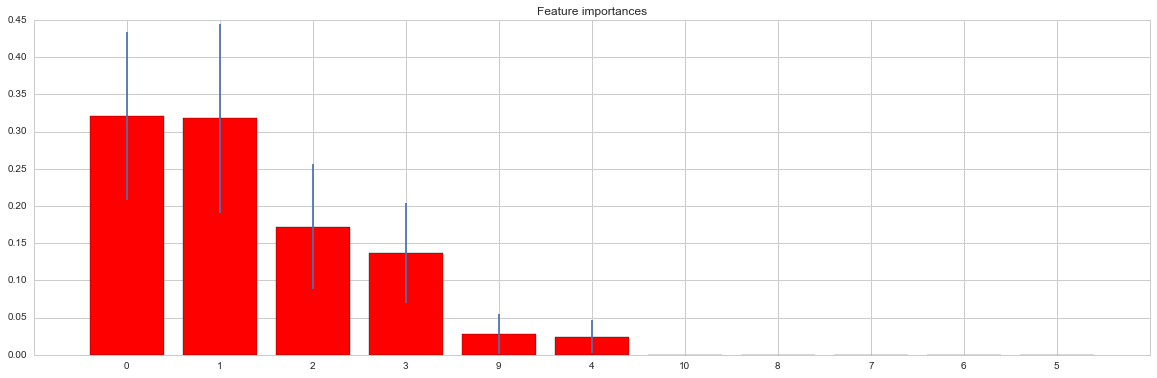

In [56]:
sns_feat(rfc, X_test)

Feature ranking:
1. feature 0: length (0.321319) 
2. feature 1: percent_nouns (0.317839) 
3. feature 2: subjectivity (0.172194) 
4. feature 3: polarity (0.136521) 
5. feature 9: has_fact (0.027690) 
6. feature 4: has_reason (0.024436) 
7. feature 10: has_argue (0.000000) 
8. feature 8: has_standard (0.000000) 
9. feature 7: has_applied (0.000000) 
10. feature 6: has_reject (0.000000) 
11. feature 5: has_therefore (0.000000) 


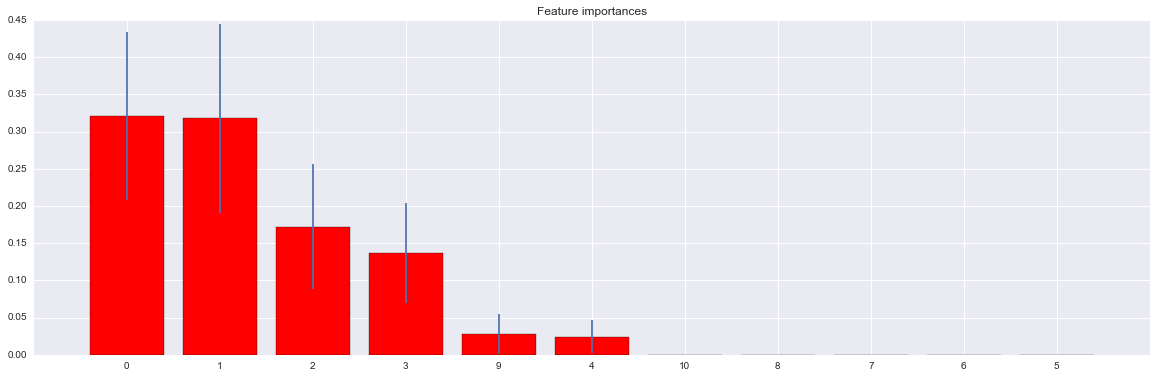

In [48]:
metrics.feat_importance(rfc, X_test)

In [49]:
lin_svc = LinearSVC()

In [50]:
lin_svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [51]:
lin_svc.score(X_test, y_test)

0.53488372093023251

In [52]:
np.argsort(lin_svc.coef_)

array([[ 1,  9,  4,  3,  5,  6,  7,  8, 10,  2,  0]])

In [53]:
def roc_curve(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list
    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''
    
    thresholds = np.sort(probabilities)

    tprs = []
    fprs = []

    num_positive_cases = sum(labels)
    num_negative_cases = len(labels) - num_positive_cases

    for threshold in thresholds:
        # With this threshold, give the prediction of each instance
        predicted_positive = probabilities >= threshold
        # Calculate the number of correctly predicted positive cases
        true_positives = np.sum(predicted_positive * labels)
        # Calculate the number of incorrectly predicted positive cases
        false_positives = np.sum(predicted_positive) - true_positives
        # Calculate the True Positive Rate
        tpr = true_positives / float(num_positive_cases)
        # Calculate the False Positive Rate
        fpr = false_positives / float(num_negative_cases)

        fprs.append(fpr)
        tprs.append(tpr)

    return tprs, fprs, thresholds.tolist()

In [54]:
tpr, fpr, thrs = roc_curve(rfc.predict_proba(X_test), y_test.reshape(43,1))

ValueError: total size of new array must be unchanged

In [ ]:
plt.plot(fpr, tpr)

In [ ]:
# from sklearn.cross_validation import KFold
# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
# y = np.array([1, 2, 3, 4])
# kf = KFold(4, n_folds=2)
# len(kf)

# print(kf)  

# KFold(n=4, n_folds=2, shuffle=False, random_state=None)

# for train_index, test_index in kf:
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

Create an ROC curve. Look in the upper right quandrant for our threshold.

Choose a threshold that predictss more true positives at the expense of false positives. We don't care about having too many false positives before our classifier is acting as a light handed filter. We want to make sure all analysis sentences come through even if it means lots of non-analysis sentences come through.

I want the Recall to be high.

In [ ]:
case4 = justia.iloc[3,1]

In [ ]:
sent_toke = SentenceTokenizer()
word_toke = WordTokenizer()

In [ ]:
word_toke.tokenize(str(np.array(case4_sents)))

In [ ]:
for sent in case4_sents:
    print sent_toke.tokenize(str(sent))

In [ ]:
case4_bigrams = {i:[] for i in xrange(len(case4_sents))}

for i, sent in enumerate(case4_sents):
    case4_bigrams[i] += bigrams(str(sent).split())

In [ ]:
# Counter(case4_bigrams)
case4_bigrams

In [ ]:
# a_idx = [i for i, truth in enumerate(l4) if truth == 1]

In [ ]:
# for i in a_idx:
#     print Counter(case4_bigrams[i])
#     print '\n'

In [ ]:
# case4_analysis = np.array(case4_sents)[a_idx]

# not_a_idx = [x for x in xrange(len(case4_sents)) if x not in a_idx]
# case4_other = np.array(case4_sents)[not_a_idx]

In [ ]:
a_idx == not_a_idx

In [ ]:
case4_other

In [ ]:
# def pos_count(sent_class):
#     pos = []
    
#     for sent in sent_class:
#         tags = []

#         for tagged in sent.tags:
#             tags.append(tagged[1])
#     #         print tagged[1]
#         pos.append(tags)
        
#     flat_pos = [el for p in pos for el in p]
    
#     most_common = Counter(flat_pos).most_common()
    
#     return {key: (float(val) / len(flat_pos)) for key, val in most_common}


In [ ]:
pos_count(case4_other)

In [ ]:
pos_count(case4_analysis)

In [ ]:
# compare_pos_count(pos_count(case4_analysis), pos_count(case4_other))

In [ ]:
case_soup = BeautifulSoup(open("case_test.html"), 'lxml')

In [ ]:
opinion = case_soup.find(id='opinion')

In [ ]:
sentences = []

# list(opinion.children)

for para in opinion.findAll('p'):
    para = para.text.encode("utf8")
    para = para.decode("utf8")
    para = TextBlob(para)
    sents = para.sentences
    
    for sent in sents:
        sentences.append(sent.words)